# Imports

In [1]:
import numpy as np
import pandas as pd
import glob
import re

from bs4 import BeautifulSoup

In [2]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt

[nltk_data] Downloading package punkt to /home/ashish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data

In [4]:
def load_reviews(path, columns=["filename", 'review']):
    assert len(columns) == 2
    l = list()
    for filename in glob.glob(path):
        # print(filename)
        with open(filename, 'r') as f:
            review = f.read()
            l.append((filename, review))
    return pd.DataFrame(l, columns=columns)

In [5]:
def load_labelled_data(path, neg='/neg/', 
                       pos='/pos/', shuffle=True):
    neg_df = load_reviews(path + neg + "*.txt")
    pos_df = load_reviews(path + pos + "*.txt")
    neg_df['sentiment'] = 0
    pos_df['sentiment'] = 1
    df = pd.concat([neg_df, pos_df], axis=0)
    if shuffle:
        df = df.sample(frac=1, random_state=42)
    return df

In [6]:
train_df = load_labelled_data("./aclImdb/train/")

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 6868 to 11154
Data columns (total 3 columns):
filename     25000 non-null object
review       25000 non-null object
sentiment    25000 non-null int64
dtypes: int64(1), object(2)
memory usage: 781.2+ KB


# Generate WordClouds and Frequencies

In [9]:
en_stopw = set(stopwords.words("english"))

def get_words(review, words, stopw=en_stopw):
    review = BeautifulSoup(review).text  # remove HTML tags
    review = re.sub('[^A-Za-z]', ' ', review)  # remove non letters
    review = review.lower()

    tok_rev = wt(review)
    rev_word = [word for word in tok_rev if word not in stopw]
    words += rev_word

In [10]:
pos_rev = train_df[train_df.sentiment == 1]

In [11]:
pos_rev.head()

,filename,review,sentiment
11516,./aclImdb/train//pos/11177_8.txt,*****Spoilers herein*****<br /><br />What real...,1
1140,./aclImdb/train//pos/2065_7.txt,Fearful Symmetry is a pleasant episode with a ...,1
1518,./aclImdb/train//pos/7147_10.txt,I found the storyline in this movie to be very...,1
409,./aclImdb/train//pos/316_10.txt,xica da Silva is one of the best Brazilians op...,1
8923,./aclImdb/train//pos/5614_10.txt,It took a long time until I could find the tit...,1


In [12]:
pos_words = []
pos_rev.review.apply(get_words, args=(pos_words,))

11516    None
1140     None
1518     None
409      None
8923     None
         ... 
4350     None
9618     None
9075     None
3295     None
11154    None
Name: review, Length: 12500, dtype: object

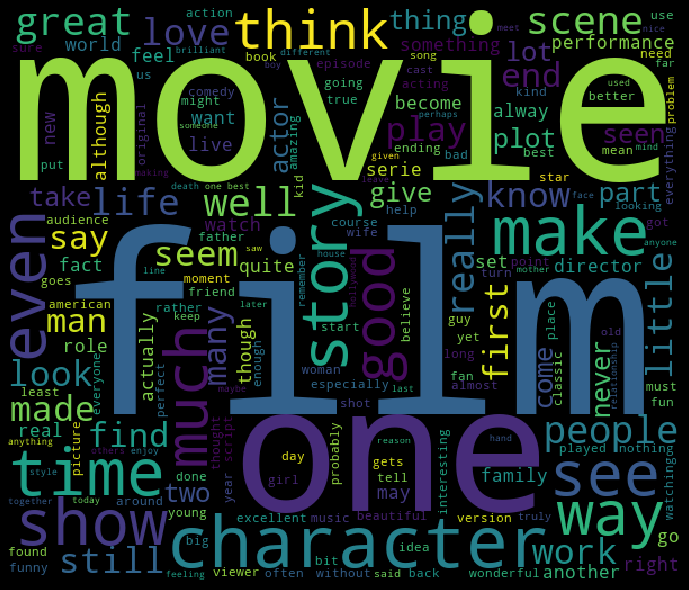

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_words_sen = " ".join(pos_words)
pos_wc = WordCloud(width = 600,height = 512).generate(pos_words_sen)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(pos_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [14]:
neg_words = []
neg_rev = train_df[train_df.sentiment == 0]
neg_rev.review.apply(get_words, args=(neg_words, ))


6868     None
9668     None
7488     None
5804     None
3386     None
         ... 
6265     None
11284    None
11964    None
5390     None
860      None
Name: review, Length: 12500, dtype: object

In [15]:
len(neg_words)

1462530

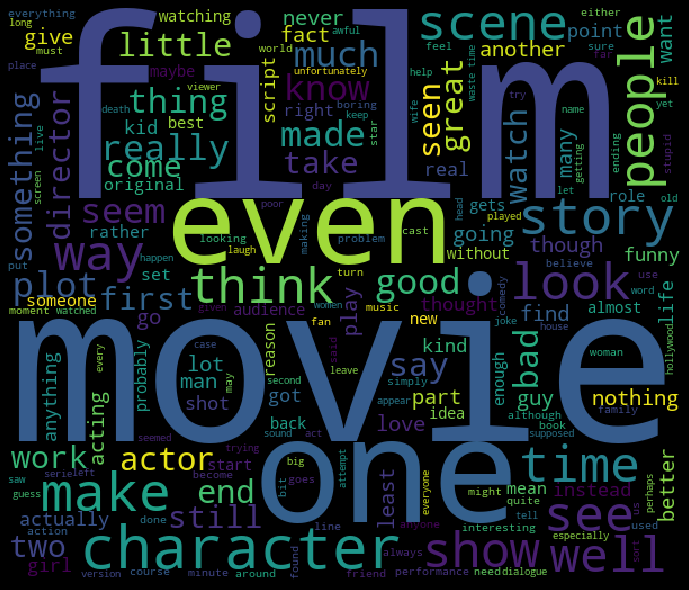

In [16]:
neg_words_sen = " ".join(neg_words)
neg_wc = WordCloud(width = 600,height = 512).generate(neg_words_sen)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(neg_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [17]:
from collections import Counter

In [18]:
pos = Counter(pos_words)
neg = Counter(neg_words)

In [19]:
pos.most_common(10)

[('film', 20934),
 ('movie', 19075),
 ('one', 13653),
 ('like', 9036),
 ('good', 7721),
 ('story', 6779),
 ('time', 6515),
 ('great', 6418),
 ('well', 6407),
 ('see', 6025)]

In [20]:
neg.most_common(10)

[('movie', 24956),
 ('film', 19213),
 ('one', 13135),
 ('like', 11238),
 ('even', 7684),
 ('good', 7419),
 ('bad', 7394),
 ('would', 7036),
 ('really', 6262),
 ('time', 6209)]

In [21]:
for word, count in pos.most_common(1000):
    negc = neg[word]
    if abs((count-negc)/count) > 0.50:
        print(word, count, negc)

great 6418 2640
even 4962 7684
best 4320 2096
acting 2435 4055
plot 2433 4152
bad 1907 7394
excellent 1682 388
thing 1663 2863
beautiful 1581 596
wonderful 1370 286
nothing 1301 2989
perfect 1242 356
performances 1238 583
least 1102 2010
loved 1087 341
anything 1075 1874
guy 1070 1965
amazing 1058 262
trying 987 1486
favorite 962 270
heart 959 369
script 954 2072
today 934 309
brilliant 926 269
looks 885 1528
enjoyed 879 366
highly 870 277
effects 856 1348
someone 848 1491
minutes 827 2125
reason 789 1534
strong 767 329
half 753 1341
idea 731 1312
money 723 1639
completely 721 1168
instead 712 1478
simple 695 328
video 687 1043
either 683 1183
wrong 668 1153
budget 657 1179
relationship 656 310
episodes 656 282
fantastic 654 144
sex 638 1045
oscar 628 233
supporting 610 289
low 610 1189
dialogue 600 942
moving 600 254
enjoyable 573 269
romantic 570 284
superb 569 102
mean 566 1117
season 550 223
greatest 549 196
care 546 839
killer 541 914
tale 541 249
realistic 524 233
problem 513 938

# Naive-Bayes Classifier

In [22]:
# lets try to build a naive bayes model for sentiment classification
tot_words = pos + neg

In [23]:
tot_words.most_common(10)

[('movie', 44031),
 ('film', 40147),
 ('one', 26788),
 ('like', 20274),
 ('good', 15140),
 ('time', 12724),
 ('even', 12646),
 ('would', 12436),
 ('story', 11983),
 ('really', 11736)]

In [24]:
top2k = [x for (x, y) in tot_words.most_common(2000)]

In [25]:
def featurize(review, topk=top2k, stopw=en_stopw):
    review = BeautifulSoup(review).text  # remove HTML tags
    review = re.sub('[^A-Za-z]', ' ', review)  # remove non letters
    review = review.lower()

    tok_rev = wt(review)
    rev_word = [word for word in tok_rev if word not in stopw]
    features = {}
    for word in top2k:
        features['contains({})'.format(word)] = (word in rev_word)
    return features

In [26]:
train = [(featurize(rev), senti) for (rev, senti) in zip(train_df.review, train_df.sentiment)]

In [27]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [32]:
# 0: negative sentiment, 1: positive sentiment
classifier.show_most_informative_features(120)

Most Informative Features
       contains(unfunny) = True                0 : 1      =     14.1 : 1.0
         contains(waste) = True                0 : 1      =     12.7 : 1.0
     contains(pointless) = True                0 : 1      =     10.4 : 1.0
     contains(redeeming) = True                0 : 1      =     10.1 : 1.0
     contains(laughable) = True                0 : 1      =      9.3 : 1.0
         contains(worst) = True                0 : 1      =      9.0 : 1.0
         contains(awful) = True                0 : 1      =      8.4 : 1.0
        contains(poorly) = True                0 : 1      =      8.2 : 1.0
   contains(wonderfully) = True                1 : 0      =      7.6 : 1.0
         contains(sucks) = True                0 : 1      =      7.0 : 1.0
          contains(lame) = True                0 : 1      =      6.9 : 1.0
      contains(pathetic) = True                0 : 1      =      6.4 : 1.0
    contains(delightful) = True                1 : 0      =      6.0 : 1.0